In [1]:
# y = x^3 + 4x^2 -17x - 4

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import math

In [3]:
x = np.linspace(-7, 4)

In [4]:
y = x**3 + 4*x**2 - 17*x - 4

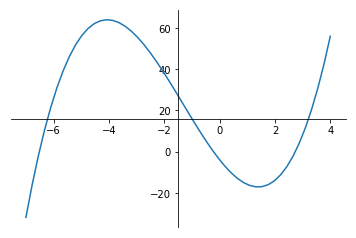

In [5]:
plt.plot(x, y)
  
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

y = x^3 + 4x^2-17x -4

y' = 3x^2 + 8x - 17

Для нахождения промежутков монотонности y ищем промежутки, на которых производная сохраняет знак

3x^2 + 8x - 17 = 0

x1 ≈ -4.06178425729082

x2 ≈ 1.39511759062415

1) x in (-inf; x1)
y' > 0 => y возрастает

2) x in (x1; x2)

y' < 0 => y убывает

3) x in (-x2; +inf)

y' > 0 => y возрастает

Будем локализовывать корень на промежутке (x1, x2)

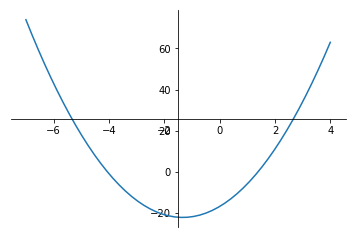

In [6]:
der_y = 3*x**2 + 8*x - 17
plt.plot(x, der_y)
  
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [7]:
# метод половинного деления

def y(x):
    return x**3 + 4*x**2 - 17*x - 4

def half_division(epsilon):
    left_border = -4.0
    right_border = 1.5
    iterations = 0
    while (left_border + epsilon < right_border):
        median = (left_border + right_border) / 2.0
        if (y(median) < 0):
            right_border = median
        else:
            left_border = median
        iterations += 1
    return (left_border, y(left_border), iterations)  

In [8]:
def test_method(method, l, r):
    epsilons = []
    iters = []
    answers = []
    difs = []
    for i in range (l, r):
        cur_epsilon = 10 ** (-i)
        (answer, y0, cur_iterations) = method(cur_epsilon)
        epsilons.append(i) # log (epsilon)
        
        log_diff = float("inf")
        if (y0 != 0):
            log_diff = -math.log10(abs(y0))
        
        difs.append(log_diff)
        iters.append(cur_iterations)
        answers.append(answer)

    plt.plot(epsilons, iters)    
    plt.plot(epsilons, difs)
    print(answers)

[-0.5625, -0.3046875, -0.2294921875, -0.22479248046875, -0.22420501708984375, -0.2241368293762207, -0.22413617372512817, -0.22413600981235504, -0.22413600981235504, -0.2241360066109337, -0.2241360066109337, -0.22413600656091148, -0.22413600655841037, -0.22413600655801957, -0.22413600655796095, -0.22413600655795302]


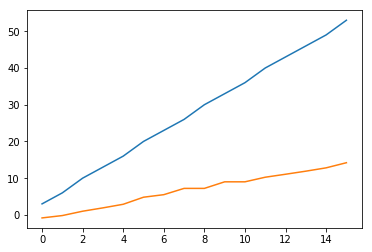

In [9]:
test_method(half_division, 0, 16)

In [10]:
def dihotomy(epsilon):
    left_border = -4.0
    right_border = 1.5
    iterations = 0
    while (left_border + epsilon < right_border):
        median = left_border - (right_border - left_border) / (y(right_border) - y(left_border)) * y(left_border)
        if (y(median) < 0):
            right_border = median
        else:
            left_border = median
        iterations += 1
    return (left_border, y(left_border), iterations) 

[-0.22553309662730392, -0.22553309662730392, -0.22553309662730392, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527, -0.2241360065579527]


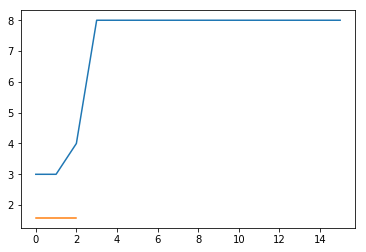

In [11]:
test_method(dihotomy, 0, 16)

In [12]:
def y_simple_it(x):
    return 0.01*x ** 3 + 0.01 * x ** 2 - 1.8 * x + 1

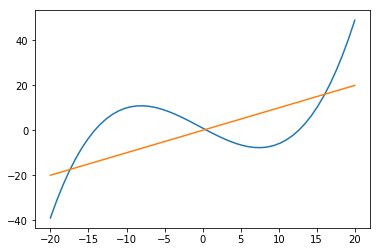

In [21]:
x = np.linspace(-20, 20)

plt.plot(x, y_simple_it(x))
plt.plot(x, x)

In [13]:
# Метод простой итерации
# 0.01*x ** 3 + 0.01 * x ** 2 - 1.8 * x + 1 = 0 
# <=> 
# 0.01*x ** 3 + 0.01 * x ** 2 - 0.8 * x + 1 = x
def phi(x):
    return 0.01*x ** 3 + 0.01 * x ** 2 - 0.8 * x + 1

def simple_iterations(epsilon):
    iterations = 0
    cur_x = -2
    next_x = phi(cur_x)
    
    while (abs(cur_x - next_x) > epsilon):
        cur_x = next_x
        next_x = phi(cur_x)
        iterations += 1
    return (next_x, y_simple_it(next_x), iterations)  

[0.9429373008118604, 0.5179278673378174, 0.5625409524829563, 0.558608489084, 0.5582157564047872, 0.5582574785450689, 0.5582530461407316, 0.5582534365530121, 0.5582534755465243, 0.5582534714040022, 0.5582534718440879, 0.5582534718053246]


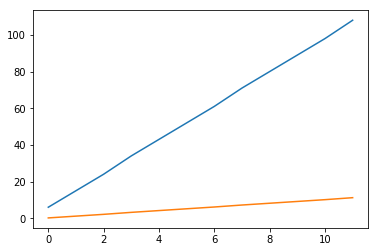

In [18]:
test_method(simple_iterations, 0, 12)

In [21]:
def der_y(x):
    return 3*x**2 + 8*x - 17

def get_next(x):
    return x - (y(x) / der_y(x))

def newton(epsilon):
    left_border = -4.0
    right_border = 1.5
    iterations = 0
    
    cur_x = (left_border + right_border) / 2.0
    next_x = get_next(cur_x)
    
    while (abs(cur_x - next_x) > epsilon):
        cur_x = next_x
        next_x = get_next(cur_x)
        iterations += 1
    return (next_x, y(next_x), iterations)

[-0.28431372549019607, -0.22474627069338005, -0.22413607299503785, -0.22413607299503785, -0.2241360065579535, -0.2241360065579535, -0.2241360065579535, -0.2241360065579535, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268, -0.22413600655795268]


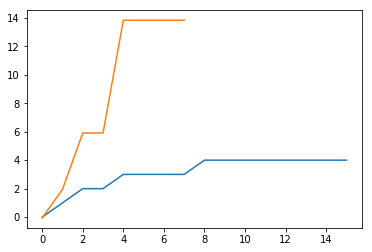

In [22]:
test_method(newton, 0, 16)